<div class = "alert alert-info>
              <h2>Imports</h2>
              </div>

<div class = "alert alert-info">
      <h2>Imports</h2>
                  </div>

In [26]:
import os
import re
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

<div class = "alert alert-info">
    <h2>Prétraitement</h2>
    <h3>Extraction du genre, division des oeuvres par actes et nettoyage des balises</h3>
                  </div>

In [27]:
liste = os.listdir("corpus/theatreClassique/XML/")

y = []
X = []

for texte in liste:
    
    try:

        f = open("corpus/theatreClassique/XML/"+texte,'r',encoding="utf-8")
        contenu = f.read()
        
    except UnicodeDecodeError:
        
        f = open("corpus/theatreClassique/XML/"+texte,'r',encoding="latin-1")
        contenu = f.read()
    

    acts = re.findall('<div1 .*?>(.*?)</div1>',contenu,flags=re.DOTALL)

    y += re.findall('<genre>(.*?)</genre>',contenu)*len(acts)

    for i in range(len(acts)):

        X.append(re.sub('<.*?>', ' ', acts[i]))
        
    f.close()

len(X),len(y)

(3156, 3156)

<div class = "alert alert-info">
      <h2>Choix des données relevantes et suppression des duplications</h2>
                  </div>

In [28]:
classes = [x[0] for x in Counter(y).most_common() if x[1] >= 10]
print("we have {} classes that exist at least 10 times, these classes are:".format(len(classes)))
classes

we have 20 classes that exist at least 10 times, these classes are:


['Tragédie',
 'Comédie',
 'Tragi-comédie',
 'Opéra',
 'Drame',
 'Proverbe',
 'Pastorale',
 'Comédie héroïque',
 'Monologue',
 'Tragédie en musique',
 'Farce',
 'opuscule dramatique',
 'Comédie-ballet',
 'Opéra comique',
 'Parodie',
 'Pastorale héroïque',
 'Tragédie lyrique',
 'Comédie galante',
 'Ballet',
 'Divertissement']

In [29]:
most_common = Counter(y).most_common(len(classes))
most_common

[('Tragédie', 1190),
 ('Comédie', 1096),
 ('Tragi-comédie', 348),
 ('Opéra', 70),
 ('Drame', 65),
 ('Proverbe', 43),
 ('Pastorale', 28),
 ('Comédie héroïque', 27),
 ('Monologue', 24),
 ('Tragédie en musique', 23),
 ('Farce', 19),
 ('opuscule dramatique', 19),
 ('Comédie-ballet', 19),
 ('Opéra comique', 17),
 ('Parodie', 17),
 ('Pastorale héroïque', 15),
 ('Tragédie lyrique', 14),
 ('Comédie galante', 11),
 ('Ballet', 11),
 ('Divertissement', 10)]

In [30]:
nbre_acts = np.sum([x[1] for x in most_common])
print("The overall dataset now is about {} acts".format(nbre_acts))
print("the mean number of words (including punctuations) in an act is {}".format(np.mean([len(x) for x in X])))

The overall dataset now is about 3066 acts
the mean number of words (including punctuations) in an act is 21188.579531051964


In [31]:
df = pd.DataFrame({"Acts":np.array(X),"Labels":np.array(y)})

data = df[df["Labels"].apply(lambda x: x in classes)]

In [32]:
data.describe()

,Acts,Labels
count,3066,3066
unique,3063,20
top,\t\n Liste des oeuvres théâtrales de Jean R...,Tragédie
freq,2,1190


In [33]:
data = data.drop_duplicates()

In [34]:
data.describe()

,Acts,Labels
count,3063,3063
unique,3063,20
top,ACTE II \n SCÈNE PREMIÈRE. ABRÉGÉ DE COMÉDIE...,Tragédie
freq,1,1187


In [39]:
data["Labels"] = pd.Categorical(data["Labels"])

data["LabelsNum"] = data["Labels"].cat.codes

<div class = "alert alert-info">
      <h2>Préparation à l'entrainement - distribution identique par classe </h2>
                  </div>

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(test_size = 0.25)

acts = data["Acts"].values
labels = data["LabelsNum"].values

for train_index, test_index in sss.split(acts,labels):
    
    X_train, X_test = acts[train_index], acts[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [37]:
X_train.shape,X_test.shape

((2297,), (766,))

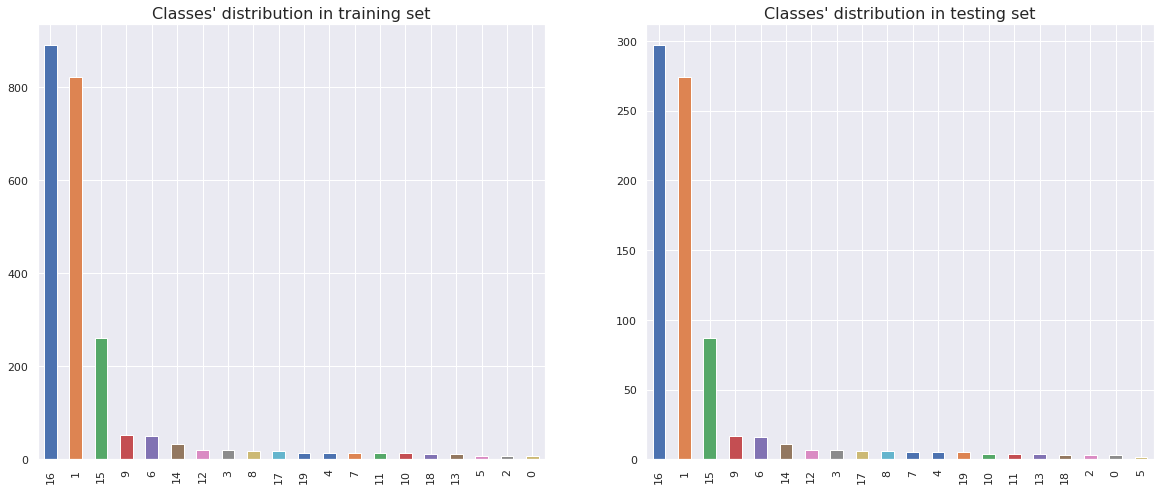

In [38]:
sns.set()
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title("Classes' distribution in training set",fontsize = 16)
pd.Series(y_train).value_counts().plot(kind='bar')

plt.subplot(122)
plt.title("Classes' distribution in testing set",fontsize = 16)
pd.Series(y_test).value_counts().plot(kind='bar')

plt.show()

In [42]:
np.max([len(x) for x in X_test])

85339